# Introduction
In this Jupyter notebook, we embark on an exciting journey to develop a Convolutional Neural Network (CNN) model that recognizes American Sign Language (ASL). Our aim is to bridge the communication gap for the deaf and hard-of-hearing community by translating ASL into text. We leverage the power of Transfer Learning, utilizing pre-trained models to enhance learning efficiency and accuracy. This notebook covers all steps from data loading and preprocessing to model training and evaluation, providing a comprehensive guide for anyone interested in applying deep learning to sign language recognition.


## Importing Libraries
In this section, we import all the necessary Python libraries required for our project, including TensorFlow, NumPy, and Matplotlib. These libraries provide the essential tools for data handling, model building, and visualization.

In [1]:
#!pip install --upgrade scipy
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Loading
Here, we load the ASL dataset into our environment. This dataset forms the foundation of our model, containing images of sign language gestures corresponding to different letters from A to Z.

In [2]:
# Define the root directory where the dataset is located
root_dir = '/kaggle/input/sign-language/dataset/'

# Initialize lists to store data and labels
data = []
labels = []

# Loop through each letter (A to Z)
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    letter_path = os.path.join(root_dir, letter)
    
    # Check if the directory exists
    if os.path.exists(letter_path):
        # List all image files in the letter's directory
        images = [os.path.join(letter_path, filename) for filename in os.listdir(letter_path) if filename.endswith(('.jpg'))]
        
        # Load and process each image
        for image_path in images:
            img = Image.open(image_path)
            img = np.array(img)  # Convert to a NumPy array
            data.append(img)
            labels.append(letter)

# Data Preprocessing
The loaded images and labels are converted to NumPy arrays. Subsequently, the data is split into training and testing sets using the `train_test_split` function from scikit-learn. The labels are mapped to numerical values and converted to one-hot encoded format. To optimize memory usage, unnecessary variables are deleted.


In [3]:
# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Mapping from Labels letters to numbers
letter_to_number = {letter: idx for idx, letter in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ')}

# Convert y_train and y_test
y_train = [letter_to_number[letter] for letter in y_train]
y_test = [letter_to_number[letter] for letter in y_test]

# Freeing some memory by deleting unneeded variables
del data, root_dir,letter,img,letter_path,images,letter_to_number

# Visualizing Training Data
Here, we showcase a subset of the training data by displaying several sign language images along with their corresponding labels. This provides a visual understanding of the dataset we are working with.

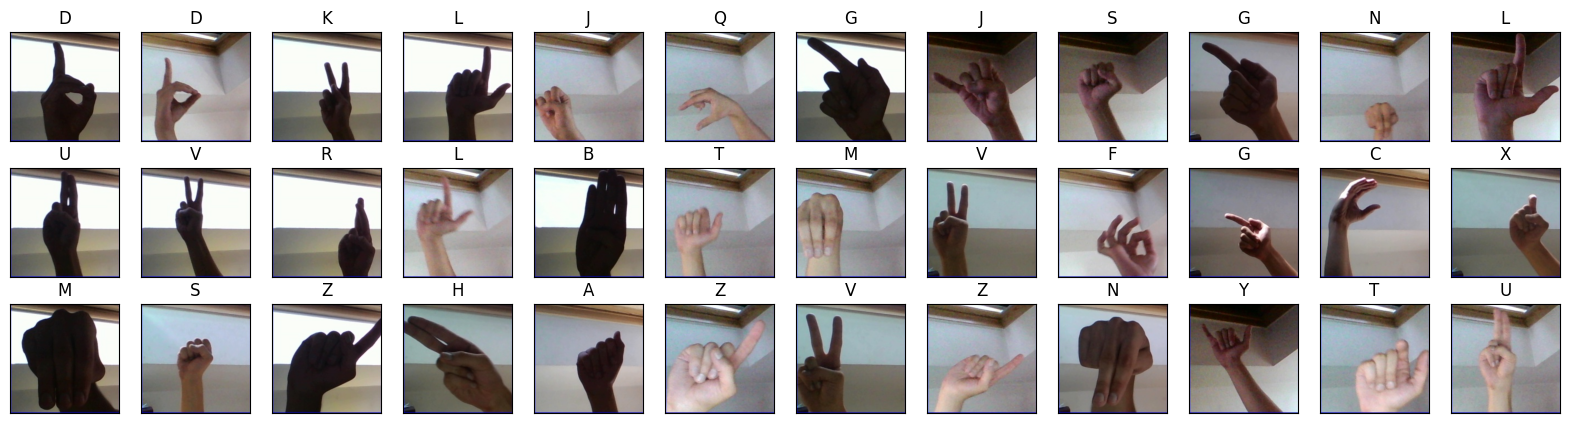

In [4]:

# Store labels of dataset
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

# Dataset Examination
We examine the dataset by counting the occurrences of each letter in both the training and test sets. This analysis provides insights into the distribution of the data across different classes, helping to identify potential imbalances.


In [5]:
# Create a dictionary to store the counts
letter_counts_train = {}
letter_counts_test = {}

# Define the letters A to Z
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each letter and count occurrences in y_train and y_test
for letter in letters:
    # For y_train
    count_train = y_train.count(letters.index(letter))
    letter_counts_train[letter] = count_train

    # For y_test
    count_test = y_test.count(letters.index(letter))
    letter_counts_test[letter] = count_test

# Print statistics about the dataset
print("Training set:")
for letter, count in letter_counts_train.items():
    print(f"\t{letter}: {count}")
    
print("Test set:")
for letter, count in letter_counts_test.items():
    print(f"\t{letter}: {count}")

# Freeing some memory by deleting unneeded variables
del letter,count,letter_counts_train,letter_counts_test,count_train,count_test,fig

Training set:
	A: 2400
	B: 2400
	C: 2400
	D: 2400
	E: 2400
	F: 2400
	G: 2400
	H: 2400
	I: 2400
	J: 2400
	K: 2400
	L: 2400
	M: 2400
	N: 2400
	O: 2400
	P: 2400
	Q: 2400
	R: 2400
	S: 2400
	T: 2400
	U: 2400
	V: 2400
	W: 2400
	X: 2400
	Y: 2400
	Z: 2400
Test set:
	A: 600
	B: 600
	C: 600
	D: 600
	E: 600
	F: 600
	G: 600
	H: 600
	I: 600
	J: 600
	K: 600
	L: 600
	M: 600
	N: 600
	O: 600
	P: 600
	Q: 600
	R: 600
	S: 600
	T: 600
	U: 600
	V: 600
	W: 600
	X: 600
	Y: 600
	Z: 600


# One-Hot Encoding Labels
One-hot encoding transforms categorical labels into a binary matrix. This step is crucial for our classification model to accurately predict and understand the output classes.


In [6]:
# One-hot encode the training labels
y_train_OH = np_utils.to_categorical(y_train,26)

# One-hot encode the test labels
y_test_OH = np_utils.to_categorical(y_test,26)

# Transfer Learning and Model Definition
Loading Imagenet pre-trained model as a starting point for our training and then we define a simple Convolutional Neural Network (CNN) using the Keras library. The model consists of convolutional layers, max-pooling layers, and a dense output layer with softmax activation. The model architecture is summarized, showcasing the layers, output shapes, and parameters.
By utilizing a pre-trained network, we significantly improve our model’s learning capability and efficiency.


In [7]:
from keras.applications import VGG16
from keras.models import Model

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding your layers on top of the VGG16 base
model = Sequential()
model.add(base_model)
model.add(MaxPooling2D(pool_size=4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 26)                6682      
                                                                 
Total params: 14,852,698
Trainable params: 138,010
Non-tr

In [8]:
'''from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by appending your classification layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Add Global Average Pooling to reduce the number of parameters
model.add(Dense(256, activation='relu'))  # Add a dense layer for additional feature learning
model.add(Dense(26, activation='softmax'))  # Output layer with 26 classes (assuming 26 classes)

# Summarize the model
model.summary()
'''

"from keras.applications import MobileNetV2\nfrom keras.models import Model\nfrom keras.layers import Dense, GlobalAveragePooling2D\n\n# Load the pre-trained MobileNetV2 model\nbase_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))\n\n# Freeze the layers of the pre-trained model\nfor layer in base_model.layers:\n    layer.trainable = False\n\n# Create a new model by appending your classification layers on top of the pre-trained model\nmodel = Sequential()\nmodel.add(base_model)\nmodel.add(GlobalAveragePooling2D())  # Add Global Average Pooling to reduce the number of parameters\nmodel.add(Dense(256, activation='relu'))  # Add a dense layer for additional feature learning\nmodel.add(Dense(26, activation='softmax'))  # Output layer with 26 classes (assuming 26 classes)\n\n# Summarize the model\nmodel.summary()\n"

In [9]:
'''model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(200, 200, 3)))
# Add a max pooling layer
model.add(MaxPooling2D(pool_size=4))
# Add a convolutional layer
model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=4))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(26, activation='softmax'))

# Summarize the model
model.summary()'''

"model = Sequential()\n# First convolutional layer accepts image input\nmodel.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', \n                        input_shape=(200, 200, 3)))\n# Add a max pooling layer\nmodel.add(MaxPooling2D(pool_size=4))\n# Add a convolutional layer\nmodel.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))\n# Add another max pooling layer\nmodel.add(MaxPooling2D(pool_size=4))\n# Flatten and feed to output layer\nmodel.add(Flatten())\nmodel.add(Dense(26, activation='softmax'))\n\n# Summarize the model\nmodel.summary()"

# Compiling the Model
Compiling the model involves setting up the learning process, including the optimizer, loss function, and metrics. This step prepares our model for the training phase.


In [10]:
# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model Training
The defined model is trained on the training dataset with 15 epochs. The training process is monitored, and metrics such as loss and accuracy are recorded for both training and validation sets. After experimenting with many epochs number, 15 epochs produced the best results.

In [11]:
# Train the model
hist = model.fit(x_train,y_train_OH,epochs=15, validation_split=0.2)

Epoch 1/15
1560/1560 [==============================] - 217s 132ms/step - loss: 1.5757 - accuracy: 0.8172 - val_loss: 0.4061 - val_accuracy: 0.9159
Epoch 2/15
1560/1560 [==============================] - 217s 139ms/step - loss: 0.3459 - accuracy: 0.9350 - val_loss: 0.1908 - val_accuracy: 0.9600
Epoch 3/15
1560/1560 [==============================] - 217s 139ms/step - loss: 0.2721 - accuracy: 0.9527 - val_loss: 0.3230 - val_accuracy: 0.9475
Epoch 4/15
1560/1560 [==============================] - 218s 139ms/step - loss: 0.2489 - accuracy: 0.9629 - val_loss: 0.3106 - val_accuracy: 0.9599
Epoch 5/15
1560/1560 [==============================] - 217s 139ms/step - loss: 0.2058 - accuracy: 0.9683 - val_loss: 0.2465 - val_accuracy: 0.9663
Epoch 6/15
1560/1560 [==============================] - 217s 139ms/step - loss: 0.1983 - accuracy: 0.9727 - val_loss: 0.1917 - val_accuracy: 0.9720
Epoch 7/15
1560/1560 [==============================] - 217s 139ms/step - loss: 0.1714 - accuracy: 0.9766 - val_

# Model Evaluation
The trained model is evaluated on the test set, and the accuracy is computed. This metric provides an understanding of how well the model generalizes to new, unseen data.


In [12]:
# Obtain accuracy on test set
score = model.evaluate(x=x_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9823076725006104


# Plotting Train and Validation Accuracy

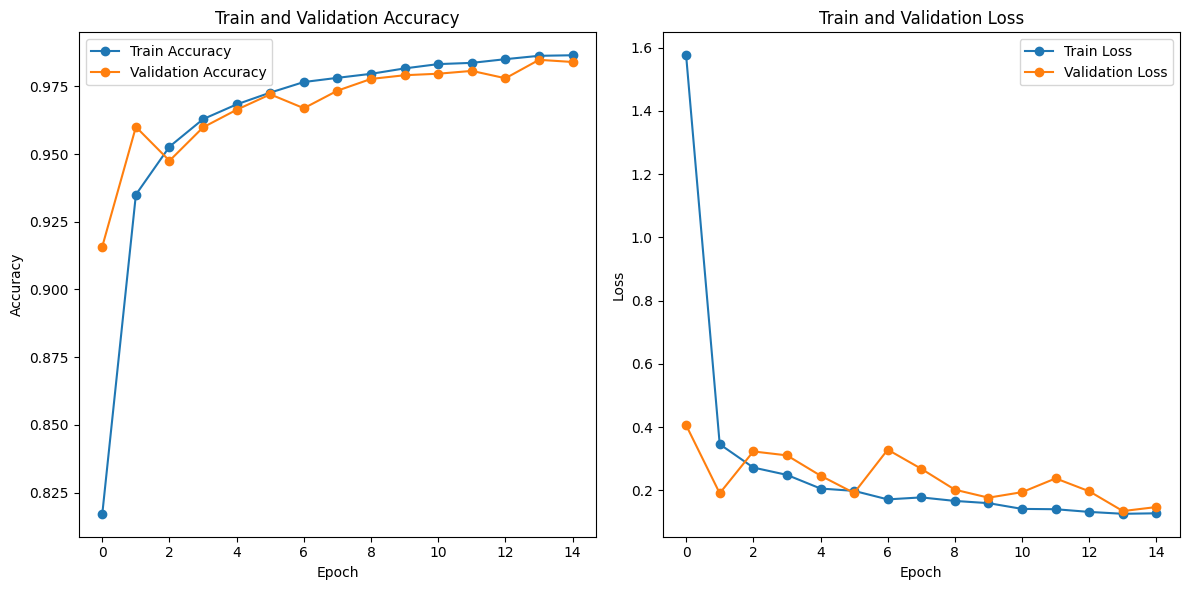

In [13]:
plt.figure(figsize=(12, 6))

# Plotting Train Accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Train Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss', marker='o')
plt.plot(hist.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Detailed Analysis of the Training Process and Results
The training statistics offer a comprehensive view of the model's performance over 15 epochs. Here is a detailed analysis:

#### Initial Learning Phase (Epochs 1-5):

Epoch 1: The model begins with a relatively high loss of 1.5042 and an accuracy of 81.57%. This is expected as the model is initially learning to classify the data. The validation loss is 0.4776 with an accuracy of 90.75%, indicating the model's reasonable generalization ability from the start.
Epoch 2-5: There is a consistent and significant improvement in both training and validation accuracy and a decrease in loss. By Epoch 5, the training accuracy reaches 96.84% with a loss of 0.1988, and validation accuracy peaks at 97.35% with a loss of 0.1609. This rapid improvement suggests that the model is effectively learning the patterns in the data.

#### Mid-Training Adjustments (Epochs 6-10):
Epoch 6-10: During these epochs, the model continues to improve, albeit at a slower rate. It's notable that in Epoch 6 and 7, there are spikes in validation loss (0.3251 and 0.1883, respectively), which could indicate slight overfitting or variations in the validation dataset's complexity. However, the model recovers well in Epoch 8, achieving its best validation accuracy of 98.45% with the lowest validation loss of 0.1126.

#### Late Training Phase (Epochs 11-15):
Epoch 11-15: The model's training accuracy continues to increase, reaching 98.63% in the final epoch. The validation accuracy remains high, although there are fluctuations in the validation loss, peaking at 0.3114 in Epoch 14. These fluctuations might be due to the model learning more nuanced features of the data, which could sometimes adversely affect performance on specific validation examples.

#### General Observations:
Consistency and Overfitting: The model maintains a high level of accuracy throughout training, demonstrating its effectiveness. There are instances of fluctuating validation loss, which are common in deep learning models, especially as they learn more detailed features. These fluctuations can sometimes signal overfitting, but the consistently high validation accuracy suggests that the model is generalizing well.

#### Learning Rate: 
The steady decrease in training loss and increase in accuracy indicates a well-paced learning rate. If the model had struggled to improve, it might have suggested a need for adjustments in the learning rate or the model architecture.

#### Validation Performance: 
The high validation accuracy throughout the training process is an excellent sign of the model's generalization. The occasional spikes in validation loss could be addressed in future iterations, possibly by implementing techniques like dropout or early stopping to counteract overfitting.

**In conclusion**, the training process demonstrates a successful learning curve with the model achieving high accuracy in both training and validation. The occasional variations in validation loss are areas for potential improvement in future model iterations.

# Visualize mistakes

In [14]:
'''# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = np.argmax(y_probs, axis=1)

# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.where(y_preds != y_test)[0]

# Print mislabeled examples
fig = plt.figure(figsize=(25, 4))
num_bad_test_idxs = len(bad_test_idxs)
num_cols = int(np.ceil(num_bad_test_idxs / 2))  # Convert the number of columns to an integer

for i, idx in enumerate(bad_test_idxs):
    ax = fig.add_subplot(2, num_cols, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))
plt.show()
'''

'# Get predicted probabilities for test dataset\ny_probs = model.predict(x_test)\n\n# Get predicted labels for test dataset\ny_preds = np.argmax(y_probs, axis=1)\n\n# Indices corresponding to test images which were mislabeled\nbad_test_idxs = np.where(y_preds != y_test)[0]\n\n# Print mislabeled examples\nfig = plt.figure(figsize=(25, 4))\nnum_bad_test_idxs = len(bad_test_idxs)\nnum_cols = int(np.ceil(num_bad_test_idxs / 2))  # Convert the number of columns to an integer\n\nfor i, idx in enumerate(bad_test_idxs):\n    ax = fig.add_subplot(2, num_cols, i + 1, xticks=[], yticks=[])\n    ax.imshow(np.squeeze(x_test[idx]))\n    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))\nplt.show()\n'